<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%208%20-%20Deep%20Learning/Wafles_or_Nachos_CNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

הקישור לשיתוף:  
https://drive.google.com/file/d/1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye/view?usp=drive_link

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import time

In [2]:
# הורדת קובץ ה-ZIP מגוגל דרייב
zip_id = "1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye"
!gdown --id {zip_id} -O dataset.zip

# חילוץ הקבצים
!unzip dataset.zip -d dataset
print("הללויה הקבצים כאן")

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye
From (redirected): https://drive.google.com/uc?id=1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye&confirm=t&uuid=8c6f324d-0f47-4e1b-a8c3-f0877873b11c
To: /content/dataset.zip
100% 105M/105M [00:00<00:00, 146MB/s]
Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/train/
   creating: dataset/test/nachos/
   creating: dataset/test/waffles/
  inflating: dataset/test/nachos/1075209.jpg  
  inflating: dataset/test/nachos/1280906.jpg  
  inflating: dataset/test/nachos/1167018.jpg  
  inflating: dataset/test/nachos/1185751.jpg  
  inflating: dataset/test/nachos/1168757.jpg  
  inflating: dataset/test/nachos/1080976.jpg  
  inflating: dataset/test/nachos/1044020.jpg  
  inflat

In [3]:
# נתיבי התיקיות
train_path = "dataset/train"
test_path = "dataset/test"

In [4]:
# טעינת התמונות ישירות מהתיקיות
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(150, 150),
    batch_size=32
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(150, 150),
    batch_size=32
)

Found 1502 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [5]:
class_names = train_dataset.class_names #תרא איזה קסם- הוא קרא את זה משמות התיקיות

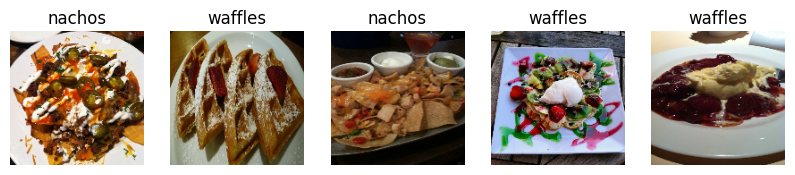

In [6]:
#בואו נראה שהוא טען את התמונות כמו שצריך
for images, labels in train_dataset.take(1):  # לקחת קבוצה אחת (רנדומלית) של תמונות
    plt.figure(figsize=(10, 5))
    for i in range(5):  # הצגת 5 תמונות
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # הצגת תמונה בפורמט של תמונה
        plt.title(class_names[int(labels[i])])  # שם הקטגוריה
        plt.axis("off")  # ביטול הצירים
    plt.show()

In [7]:
# בנו מודל למיון התמונות
# חד פעמים שכבה ראשונה במודל צריכה להיות:
# tf.keras.layers.Rescaling(1./255),  # שכבת נורמליזציה
# בחרו פונקציית אקטיבציה בשכבת הפלט בתבונה

model = tf.keras.Sequential([
    # Rescaling
    tf.keras.layers.Rescaling(1./255),

    # Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flattening the image in preparatio for the NN
    tf.keras.layers.Flatten(),

    # Neural Network
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(516, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
# קומפילציה של המודל
#בחרו פונקציית הפסד בתבונה

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [9]:
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=0.00001)

callbacks = [reduce_lr_on_plateau]

In [10]:
# אימון המודל
# השתמשו בנתוני המבחן עבור סט הולידציה
start_time = time.time()

# Training the model 💪
history = model.fit(
    train_dataset,
    batch_size=32,
    epochs=15,
    callbacks=callbacks,
    validation_data=test_dataset
)

print("---------------------------------")
print(f"The model took {time.time() - start_time :.2f} seconds to train the model")

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 358ms/step - accuracy: 0.4919 - loss: 0.9609 - val_accuracy: 0.5000 - val_loss: 0.6993 - learning_rate: 0.0010
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.5041 - loss: 0.6932 - val_accuracy: 0.5820 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.5669 - loss: 0.6903 - val_accuracy: 0.5960 - val_loss: 0.6730 - learning_rate: 0.0010
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.5987 - loss: 0.6819 - val_accuracy: 0.5960 - val_loss: 0.6543 - learning_rate: 0.0010
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.6273 - loss: 0.6524 - val_accuracy: 0.5800 - val_loss: 0.6759 - learning_rate: 0.0010
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7129 - loss: 0.5664 - val_accuracy: 0.5840 - val_loss: 0.7304 - learning_rate: 0.0010
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8055 - loss: 0.3977

In [11]:
# הערכת המודל
model.evaluate(test_dataset)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5922 - loss: 4.4483


[4.340231418609619, 0.6119999885559082]

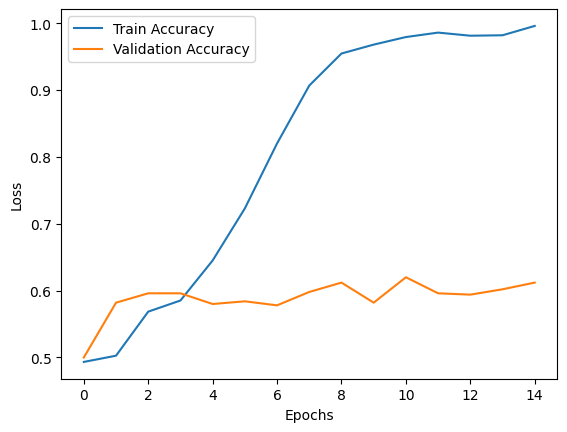

In [12]:
# הצגת גרף דיוק האימון
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()